In [14]:
import random
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram

In [2]:
data = pd.read_csv('data/iris.data', header=None)
no_labeled_data = data.drop(labels=[4], axis=1)
no_labeled_data

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [64]:
def plot_kmeans(data, kmeans):
    k_means_cluster_centers = kmeans.cluster_centers_
    k_means_labels = pairwise_distances_argmin(data, k_means_cluster_centers)
    
    f, ax = plt.subplots(1, 3, figsize=(14, 4))
    colors = ['#4EACC5', '#FF9C34', '#4E9A06']
    
    for i in range(3):
        my_members = k_means_labels == i
        cluster_center = k_means_cluster_centers[i]
        for j in range(3):
            ax[j].plot(no_labeled_data.loc[my_members][j], 
                       no_labeled_data[my_members][j+1], 
                       'w',
                       markerfacecolor=colors[i], 
                       marker='o', 
                       markersize=4)
            ax[j].plot(cluster_center[j], 
                       cluster_center[j+1], 
                       'o',
                       markerfacecolor=colors[i],
                       markeredgecolor='k', 
                       markersize=8)
    plt.show()

In [72]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=15)
k_means.fit(no_labeled_data)

KMeans(n_clusters=3, n_init=15)

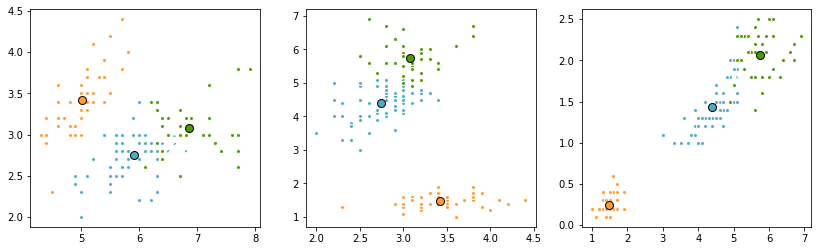

In [73]:
plot_kmeans(no_labeled_data, k_means)

(-2.26249195386214, 2.3705240359763335)

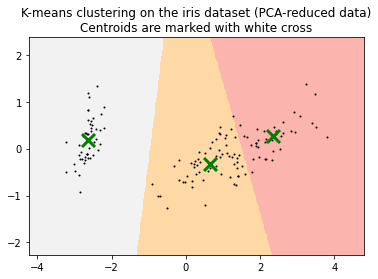

In [29]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(no_labeled_data)

k_means_r = KMeans(init='k-means++', n_clusters=3, n_init=15)
k_means_r.fit(reduced_data)

h = .02
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = k_means_r.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(figsize=(6, 4))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Pastel1,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
centroids = k_means_r.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='g', zorder=10)
plt.title('K-means clustering on the iris dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

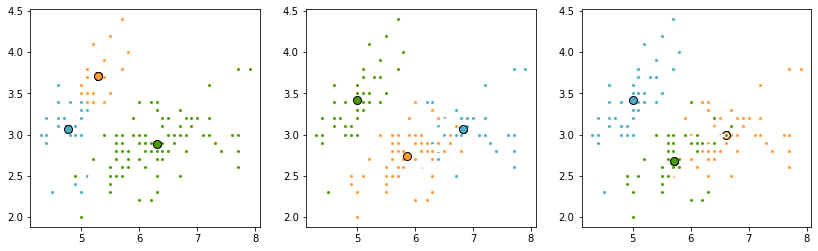

In [39]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))

for i in range(3):
    k_means = KMeans(init='random', n_clusters=3, n_init=1, max_iter=5)
    k_means.fit(no_labeled_data)
    
    k_means_cluster_centers = k_means.cluster_centers_
    k_means_labels = pairwise_distances_argmin(no_labeled_data, k_means_cluster_centers)

    for j in range(3):
        my_members = k_means_labels == j
        cluster_center = k_means_cluster_centers[j]
        for k in range(3):
            ax[i].plot(no_labeled_data.loc[my_members][0], 
                       no_labeled_data[my_members][0+1], 
                       'w',
                       markerfacecolor=colors[j], 
                       marker='o', 
                       markersize=4)
            ax[i].plot(cluster_center[0], 
                       cluster_center[0+1], 
                       'o',
                       markerfacecolor=colors[j],
                       markeredgecolor='k', 
                       markersize=8)

plt.show()

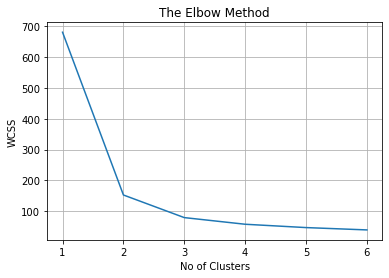

In [63]:
wcss = []
for i in range(1,7):
    kmean = KMeans(n_clusters=i,init="k-means++")
    kmean.fit_predict(no_labeled_data)
    wcss.append(kmean.inertia_)
    
plt.plot(range(1,7),wcss)
plt.title('The Elbow Method')
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.grid()
plt.show()

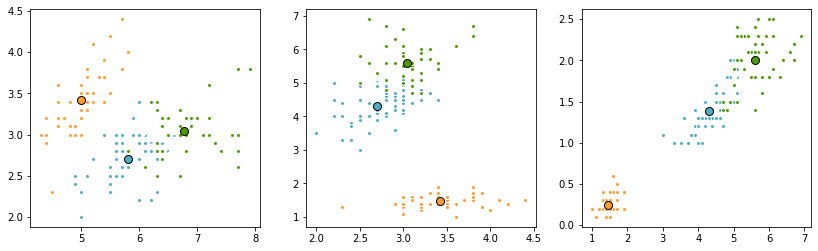

In [112]:
mbkmeans = MiniBatchKMeans(n_clusters=3, n_init=15)
mbkmeans.fit(no_labeled_data)

plot_kmeans(no_labeled_data, mbkmeans)

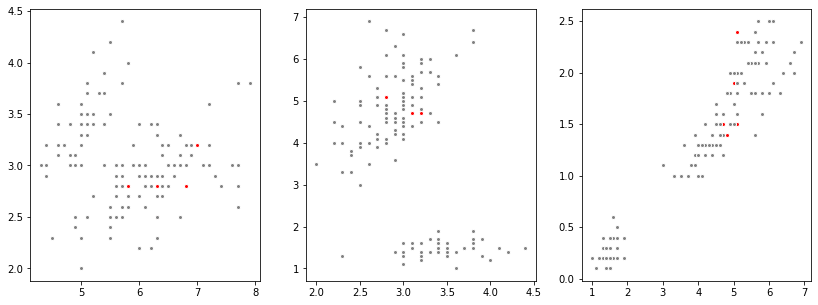

In [113]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=15)
k_means.fit(no_labeled_data)

diff = np.array([kms != mbkms for kms, mbkms in zip(k_means.labels_, mbkmeans.labels_)])

f, ax = plt.subplots(1, 3, figsize=(14, 5))

for j in range(3):
    ax[j].plot(no_labeled_data[diff][j], no_labeled_data[diff][j+1], 'w', markerfacecolor='r', marker='o', markersize=4, lw=0)
    ax[j].plot(no_labeled_data[~diff][j], no_labeled_data[~diff][j+1], 'w', markerfacecolor='grey', marker='o', markersize=4, lw=0)


plt.show()

In [3]:
hier = AgglomerativeClustering(n_clusters=3, linkage='average')
hier = hier.fit(no_labeled_data)
hier_labels = hier.labels_

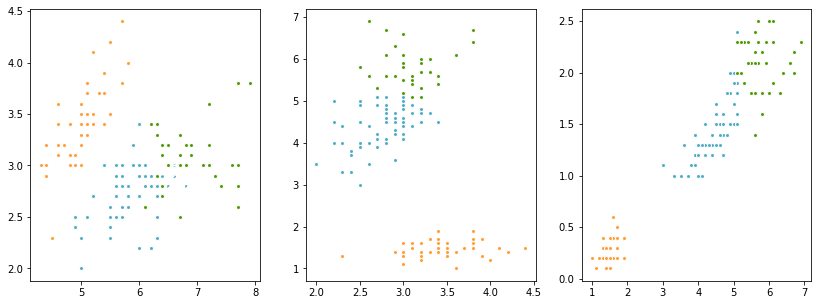

In [4]:
def plot_aggl(data, hier, n_clusters=3): 
    f, ax = plt.subplots(1, 3, figsize=(14, 5))
    colors = ['#4EACC5', '#FF9C34', '#4E9A06', '#FC57ED', '#5B5B5D']
    for i in range(n_clusters):
        hier_labels = hier.labels_
        my_members = hier_labels == i
        for j in range(3):
            ax[j].plot(data[my_members][j],
                       data[my_members][j+1], 'w',
                       markerfacecolor=colors[i],
                       marker='o', markersize=4)
    plt.show()
    
plot_aggl(no_labeled_data, hier)

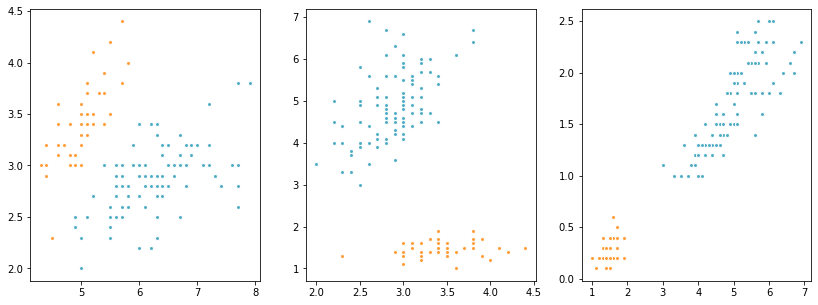

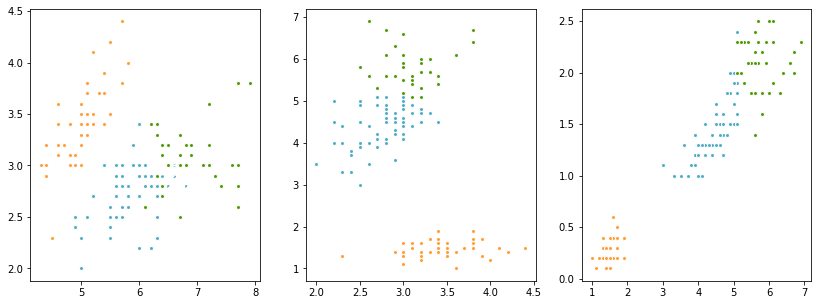

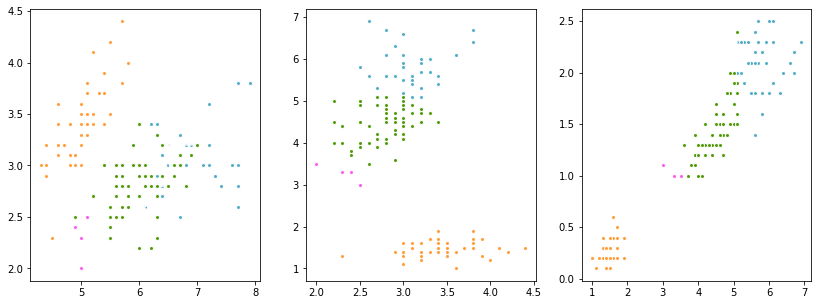

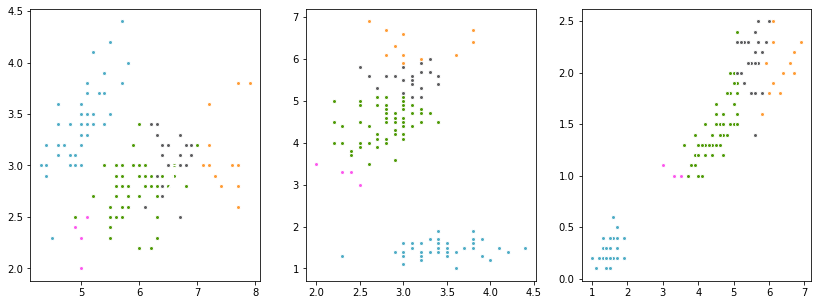

In [125]:
for i in range(2, 6):
    hier = AgglomerativeClustering(n_clusters=i, linkage='average')
    hier = hier.fit(no_labeled_data)
    plot_aggl(no_labeled_data, hier, n_clusters=i)

In [8]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Heirarchical Clustering Dendrogram')
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")

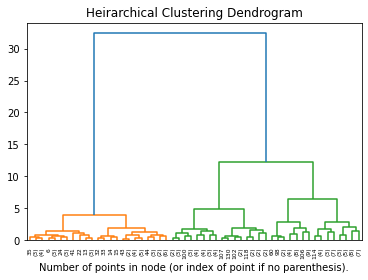

In [10]:
model_for_dendro = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
model_for_dendro.fit(no_labeled_data)

plot_dendrogram(model_for_dendro, truncate_mode='level', p=5)
plt.show()

In [15]:
data1 = np.zeros([250,2])

for i in range(250):
    r = random.uniform(1, 3)
    a = random.uniform(0, 2 * math.pi)
    data1[i,0] = r * math.sin(a)
    data1[i,1] = r * math.cos(a)

data2 = np.zeros([500,2])

for i in range(500):
    r = random.uniform(5, 9)
    a = random.uniform(0, 2 * math.pi)
    data2[i,0] = r * math.sin(a)
    data2[i,1] = r * math.cos(a)
data = np.vstack((data1, data2))

In [16]:
def aggl_plot(aggl, data):
    my_members = aggl.labels_ == 0
    plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o',
        markersize=4,
        color='red',linestyle='None')

    my_members = aggl.labels_ == 1
    plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o',
        markersize=4,
        color='blue',linestyle='None')
    plt.show()

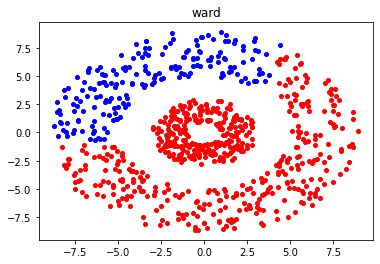

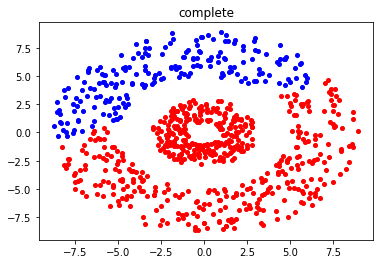

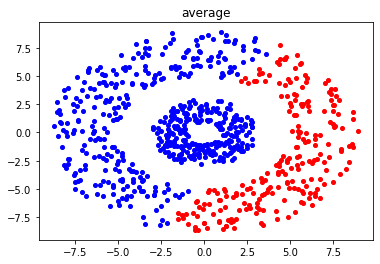

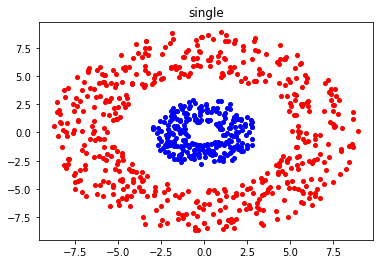

In [17]:
linkages = ['ward', 'complete', 'average', 'single']

for linkage in linkages:
    hier = AgglomerativeClustering(n_clusters=2, linkage=linkage)
    hier = hier.fit(data)
    plt.title(linkage)
    aggl_plot(hier, data)